# PROJECT- Face Detection with Haar Cascades
## Name: John Paul J
## Reg. No: 212223230093

In [1]:
import cv2
import matplotlib.pyplot as plt

# Ensure inline plotting for Jupyter
%matplotlib inline 

# --- Load the Haar Cascade Classifiers ---
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier('haarcascade_mcs_mouth.xml') # Using mcs version
nose_cascade = cv2.CascadeClassifier('haarcascade_mcs_nose.xml')   # Using mcs version

# Check if classifiers loaded successfully
if face_cascade.empty():
    print("Error: Face cascade file not loaded.")
if eye_cascade.empty():
    print("Error: Eye cascade file not loaded.")
if mouth_cascade.empty():
    print("Error: Mouth cascade file not loaded.")
if nose_cascade.empty():
    print("Error: Nose cascade file not loaded.")

In [2]:
# --- Load the Image ---
img = cv2.imread('imag.jpg') 

if img is None:
    print("Error: Could not load image. Check the file path.")
    # Exit the script if image loading fails
    # raise SystemExit 
    
# --- Convert to Grayscale ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# Create a copy for drawing rectangles, converted to RGB for Matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
# --- A. Detect Faces ---
faces = face_cascade.detectMultiScale(gray, 1.1, 4) 

print(f"Found {len(faces)} face(s).")

# --- B. Loop through all detected faces ---
for (x, y, w, h) in faces:
    # 1. Draw rectangle around the FACE (Blue rectangle)
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 0, 255), 3)

    # 2. Define the Region of Interest (ROI) for the face
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = img_rgb[y:y + h, x:x + w]

    # --- C. Detect Eyes within the face ROI ---
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
    for (ex, ey, ew, eh) in eyes:
        # Draw rectangle around the EYE (Green rectangle)
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
        
    # --- D. Detect Mouth within the face ROI ---
    # For mouth, it's often better to search in the lower half of the face
    # Adjust ROI for mouth to only be the lower 1/2 or 1/3 of the face for better accuracy
    mouth_roi_gray = gray[y + int(h/2):y + h, x:x + w]
    mouth_roi_color = img_rgb[y + int(h/2):y + h, x:x + w]
    
    # mouth = mouth_cascade.detectMultiScale(mouth_roi_gray, 1.3, 5) # Common parameters
    mouth = mouth_cascade.detectMultiScale(mouth_roi_gray, 1.7, 11) # Adjusted for better results with mcs_mouth
    
    for (mx, my, mw, mh) in mouth:
        # Draw rectangle around the MOUTH (Magenta rectangle)
        # Note: (mx, my) are relative to mouth_roi_color
        cv2.rectangle(mouth_roi_color, (mx, my), (mx + mw, my + mh), (255, 0, 255), 2)
        # We can also limit the number of mouths drawn to prevent multiple boxes
        # if len(mouth) > 0: break # uncomment to draw only one mouth (the largest)

    # --- E. Detect Nose within the face ROI ---
    # For nose, search typically around the center of the face
    # We can adjust ROI for nose if needed, but for simplicity, let's use the full face ROI first
    nose = nose_cascade.detectMultiScale(roi_gray, 1.1, 4) # Common parameters
    
    for (nx, ny, nw, nh) in nose:
        # Draw rectangle around the NOSE (Yellow rectangle)
        cv2.rectangle(roi_color, (nx, ny), (nx + nw, ny + nh), (255, 255, 0), 2)
        # We can also limit the number of noses drawn to prevent multiple boxes
        # if len(nose) > 0: break # uncomment to draw only one nose (the largest)

Found 1 face(s).


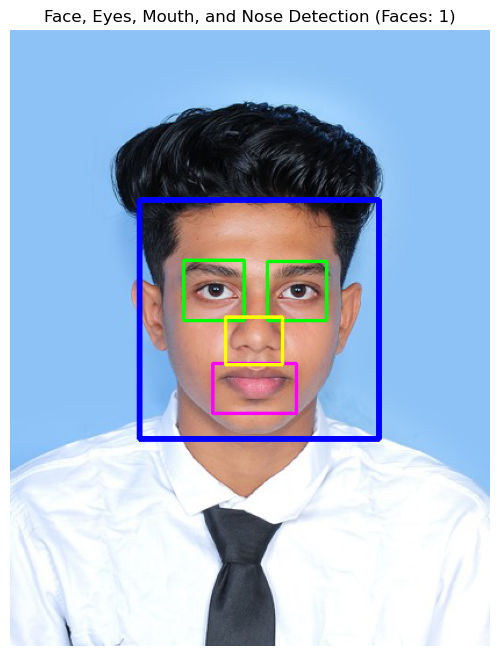

In [4]:
# --- Display the Result ---
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.title(f"Face, Eyes, Mouth, and Nose Detection (Faces: {len(faces)})")
plt.axis('off')
plt.show()